## Descriptive Analysis

A notebook to describe the data set with simple statistical tools.

In [19]:
import pandas as pd
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os

# to import ml_colon
sys.path.append(os.path.join(os.getcwd(), os.pardir, 'src')) 

import ml_colon

### Setting up Data Directory

In [20]:
data_dir = ml_colon.HERE.parents[2] / "data" 
print(data_dir)

assert data_dir.exists()

data_files = list(data_dir.glob("*.csv"))
print([f.name for f in data_files])

assert data_files

/Users/JeongSooMin/Documents/workspace/data_processes_mlcolonoscopy/notebooks/../data
['raw_data.csv', 'data_description.csv']


### Loading Raw Data

In [21]:
_filepath = data_dir / "raw_data.csv"
df = pd.read_csv(_filepath)

# assert all rows have been loaded
len(df) == sum(1 for i in open(_filepath)) -1 # file has header

print(f"Raw data set has: {len(df)} rows")

Raw data set has: 16000 rows


In [22]:
descr_df = pd.read_csv(data_dir / "data_description.csv", index_col="column_name")

In [23]:
print(descr_df)

                                                         description
column_name                                                         
quality              a measure of the quality of the recorded video.
bits               number of bits used to encode that block in th...
intra_parts        number sub-blocks inside this block that are n...
skip_parts         number sub-blocks inside this block that are s...
inter_16x16_parts  number of sub-blocks inside this block making ...
inter_4x4_parts    number of sub-blocks inside this block making ...
inter_other_parts  number of sub-blocks inside this block making ...
non_zero_pixels    number of pixels different from 0 after encodi...
frame_width                  the width of the video frame in pixels.
frame_height                the height of the video frame in pixels.
movement_level     a measure of the level of movement of this fra...
mean                        mean of the pixels of the encoded block.
sub_mean_1         mean of the pix

Let's take a quick look at the actual data.

In [54]:
df.head()

,quality,bits,intra_parts,skip_parts,inter_16x16_parts,inter_4x4_parts,inter_other_parts,non_zero_pixels,frame_width,frame_height,...,sobel_h,sobel_v,variance,block_movement_h,block_movement_v,var_movement_h,var_movement_v,cost_1,cost_2,relevant
0,22,2143,0,0,1,3,21,404,416,240,...,17.397461,17.397461,87.584335,2.820312,2.539062,10.772400,8.576599,0.0,0.0,1.0
1,22,1735,0,2,0,3,8,381,416,240,...,14.426758,14.233398,48.025330,1.843750,1.921875,6.163086,6.665771,8816.0,8801.0,1.0
2,22,1971,0,0,0,0,8,460,416,240,...,15.203125,13.953125,56.613480,3.000000,4.937500,1.625000,3.683594,5104.0,5193.0,1.0
3,22,2473,0,0,0,18,20,421,416,240,...,21.725586,29.165039,283.079285,2.078125,2.500000,25.806396,34.656250,21531.0,19802.0,1.0
4,22,1093,0,0,1,3,8,167,416,240,...,11.929688,14.353516,175.123245,3.070312,4.523438,22.252869,14.780701,15073.0,14549.0,1.0


Let's take a quick look at the datatypes in the dataframe

In [24]:
df.dtypes

quality                int64
bits                   int64
intra_parts            int64
skip_parts             int64
inter_16x16_parts      int64
inter_4x4_parts        int64
inter_other_parts      int64
non_zero_pixels        int64
frame_width            int64
frame_height           int64
movement_level         int64
mean                 float64
sub_mean_1           float64
sub_mean_2           float64
sub_mean_3           float64
sub_mean_4           float64
var_sub_blocks       float64
sobel_h              float64
sobel_v              float64
variance             float64
block_movement_h     float64
block_movement_v     float64
var_movement_h       float64
var_movement_v       float64
cost_1               float64
cost_2               float64
relevant             float64
dtype: object

Conclusion:
Looks like we are only dealing with numerical data (no characters, strings, datetimes, ...)

However, the int64 types seem to be discrete and may need special care.

### Missing Values?

Next, let's take a look if there are any Nulls, NaNs in the data set and if so how many.

In [25]:
_null_df = df.isnull().sum()

print(_null_df[_null_df > 0])

sub_mean_3    14
cost_2        17
relevant       2
dtype: int64


The missing values for sub_mean_3 and cost_2 maybe can be imputed / recovered. (or dropped since there are only 17 at most)

For the target variable "relevant" not. It's probably best to drop these 2 rows as we later also want to exclude them from training / testing the model and its only a total of 2 rows...

In [26]:
df = df[~df.relevant.isnull()]

len(df)

15998

### Column Analysis

We want to go over each variable in the dataset and explore it with simple descriptive statistics.

A first overview can be seen here:

In [27]:
df.describe()

,quality,bits,intra_parts,skip_parts,inter_16x16_parts,inter_4x4_parts,inter_other_parts,non_zero_pixels,frame_width,frame_height,...,sobel_h,sobel_v,variance,block_movement_h,block_movement_v,var_movement_h,var_movement_v,cost_1,cost_2,relevant
count,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,...,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15981.000000,15998.000000
mean,29.500938,449.697400,11.041380,0.849294,0.995499,1.977997,3.685273,74.059007,1432.075009,850.046256,...,8.027204,8.270743,53.333526,8.024506,6.797750,842.053206,491.974570,36943.436492,42055.148051,0.822353
std,5.590065,549.099212,19.051407,1.181890,1.018540,3.901329,4.445079,102.584098,851.931382,530.222216,...,9.184985,9.552621,107.271594,17.260686,11.552863,3815.457401,2404.213566,38630.539744,43844.993440,0.382227
min,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,416.000000,240.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,520.000000,300.000000,...,0.896240,0.943359,1.424382,0.500000,0.500000,0.687500,0.746094,9916.250000,10964.000000,1.000000
50%,32.000000,243.000000,0.000000,0.000000,1.000000,0.000000,2.000000,33.000000,1920.000000,1080.000000,...,5.170898,5.313477,14.525076,2.625000,3.214844,11.685547,19.544434,23048.500000,26132.000000,1.000000
75%,35.750000,622.000000,16.000000,1.000000,2.000000,3.000000,6.000000,100.000000,2400.000000,1470.000000,...,11.628906,11.776123,52.494076,7.062500,8.062500,94.125549,96.068176,52043.250000,59856.000000,1.000000
max,37.000000,4771.000000,64.000000,4.000000,4.000000,33.000000,27.000000,828.000000,2560.000000,1600.000000,...,69.706055,66.775391,2022.197998,322.093750,189.000000,194634.750000,68389.359375,425705.000000,446306.000000,1.000000


#### Column: Quality

a measure of the quality of the recorded video.


<AxesSubplot:ylabel='Count'>

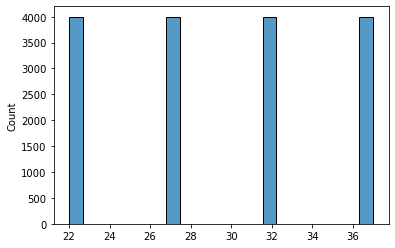

In [28]:
column_name = "quality"
print(descr_df.loc[column_name, "description"])

sns.histplot(df[column_name].values)

In [29]:
df[column_name].value_counts()

32    4000
27    4000
37    4000
22    3998
Name: quality, dtype: int64

Looks like a Discrete uniform distribution, but maybe data set was sampled in that way...


#### Column: Bits

In [30]:

column_name = "bits"
print(descr_df.loc[column_name, "description"])

number of bits used to encode that block in the video stream.


<AxesSubplot:title={'center':'Histogram of bits'}, ylabel='Count'>

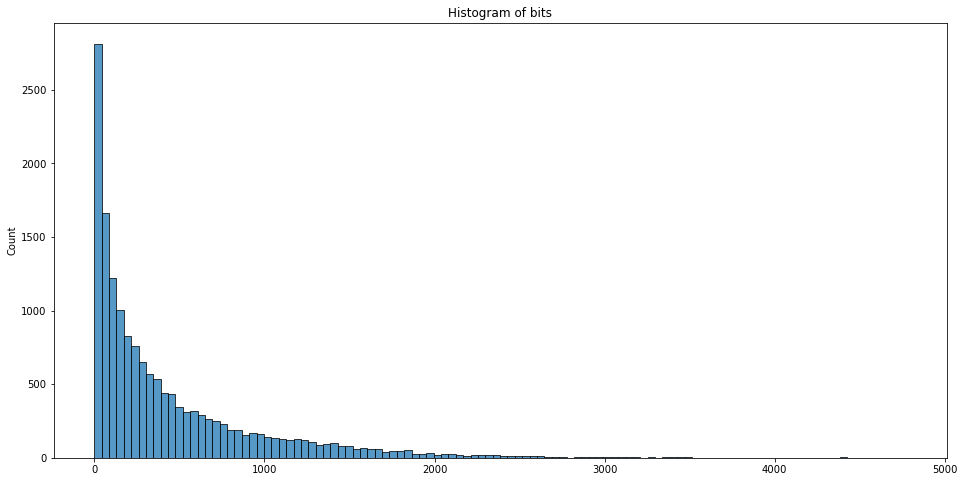

In [31]:

fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")

sns.histplot(df[column_name].values, ax=ax)

The distribution is highly skewed and it looks like most of the blocks are encoded using only a few bits.
This raises the question: Are there blocks that allegedly are encoded with 0 bits in the video stream?

Note: This should not be possible as 0 bits would mean 0 information in my opinion. 

Let's identify the characteristics of the rows whose value of "bits" is 0

In [59]:
df[df["bits"]==0].head()

,quality,bits,intra_parts,skip_parts,inter_16x16_parts,inter_4x4_parts,inter_other_parts,non_zero_pixels,frame_width,frame_height,...,sobel_h,sobel_v,variance,block_movement_h,block_movement_v,var_movement_h,var_movement_v,cost_1,cost_2,relevant
2312,32,0,0,4,0,0,0,0,416,240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97086.0,106606.0,1.0
2571,32,0,0,4,0,0,0,0,416,240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39157.0,41706.0,1.0
3614,37,0,0,4,0,0,0,0,416,240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46928.0,14619.0,1.0
3672,37,0,0,4,0,0,0,0,416,240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94751.0,139392.0,1.0
3675,37,0,0,4,0,0,0,0,416,240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43672.0,57860.0,0.0


In [57]:
df[df["bits"]==0].sum()

quality              4.939000e+03
bits                 0.000000e+00
intra_parts          0.000000e+00
skip_parts           5.880000e+02
inter_16x16_parts    0.000000e+00
inter_4x4_parts      0.000000e+00
inter_other_parts    0.000000e+00
non_zero_pixels      0.000000e+00
frame_width          3.183680e+05
frame_height         1.930800e+05
movement_level       1.115301e+09
mean                 1.838281e+01
sub_mean_1           1.933203e+01
sub_mean_2           1.392188e+01
sub_mean_3           1.672656e+01
sub_mean_4           2.355078e+01
var_sub_blocks       4.743268e+01
sobel_h              5.641211e+01
sobel_v              5.796680e+01
variance             2.654711e+02
block_movement_h     0.000000e+00
block_movement_v     0.000000e+00
var_movement_h       0.000000e+00
var_movement_v       0.000000e+00
cost_1               2.591150e+06
cost_2               2.820001e+06
relevant             8.000000e+01
dtype: float64

When the value of <i>bits</i> is 0, <i>intra_parts, inter_16x16_parts, inter_4x4_parts, inter_other_parts, non_zero_pixels, block_movement_h, block_movement_v, var_movement_h, var_movement_v</i> are zero as well. So, what do they represent?

In [74]:
pd.options.display.max_colwidth = 200
descr_df.loc[df[df["bits"]==0].sum()==0]

,description
column_name,
bits,number of bits used to encode that block in the video stream.
intra_parts,number sub-blocks inside this block that are not encoded by making use of information in other frames.
inter_16x16_parts,number of sub-blocks inside this block making use of information in other frames and whose size is 16x16 pixels.
inter_4x4_parts,number of sub-blocks inside this block making use of information in other frames and whose size is 4x4 pixels.
inter_other_parts,number of sub-blocks inside this block making use of information in other frames and whose size is different from 16x16 and 4x4 pixels.
non_zero_pixels,number of pixels different from 0 after encoding the block.
block_movement_h,a measure of the movement of the current block in the horizontal direction.
block_movement_v,a measure of the movement of the current block in the vertical direction.
var_movement_h,a measure of the variance of the movements inside the current block in the horizontal direction.


In [32]:
print("Number of rows with 0 bits: ", len(df[df[column_name] ==0]))

Number of rows with 0 bits:  147


In [33]:
pd.cut(df[column_name], bins=[0, 8, 16, 32, 64, 124], include_lowest=False).value_counts(sort=False)

(0, 8]        696
(8, 16]       419
(16, 32]      964
(32, 64]     1494
(64, 124]    1818
Name: bits, dtype: int64

There are some block that are encoded with a very small number of bits. 696 rows are encoded with at most 8 bits. Will be interesting to see how quality depends on number of bits...For now we keep these rows but potentially these rows we have to deal with separately.

#### intra_parts

In [34]:
column_name = "intra_parts"
print(descr_df.loc[column_name, "description"])

number sub-blocks inside this block that are not encoded by making use of information in other frames.


<AxesSubplot:title={'center':'Histogram of intra_parts'}, ylabel='Count'>

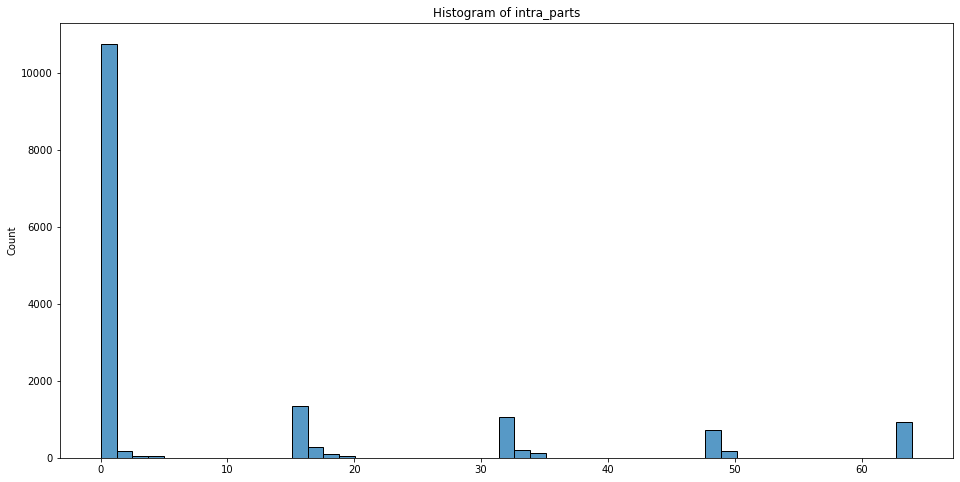

In [35]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")

sns.histplot(df[column_name].values, ax=ax)

In [36]:
df[column_name].value_counts(sort=False)

0     10310
16     1355
32     1060
48      718
64      919
1       440
17      280
33      198
49      176
2       177
18       97
34      115
3        45
19       55
4        53
Name: intra_parts, dtype: int64

The big majority of rows have 0 sub-blocks. Not sure if I yet understand what these sub-blocks are...

#### skip_parts

In [37]:
column_name = "skip_parts"
print(descr_df.loc[column_name, "description"])

number sub-blocks inside this block that are straight-forward copied from another frame.


<AxesSubplot:title={'center':'Histogram of skip_parts'}, xlabel='skip_parts', ylabel='Count'>

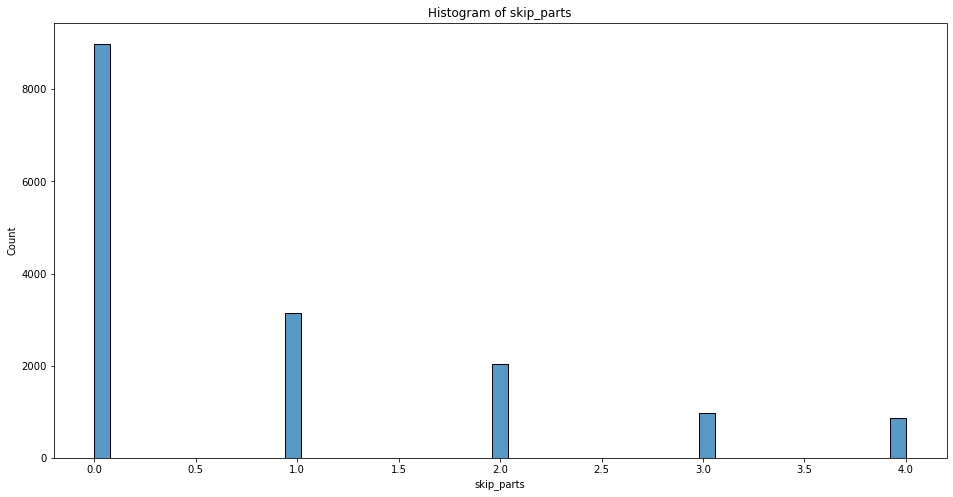

In [38]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")
sns.histplot(df[column_name])

In [39]:
df.columns

Index(['quality', 'bits', 'intra_parts', 'skip_parts', 'inter_16x16_parts',
       'inter_4x4_parts', 'inter_other_parts', 'non_zero_pixels',
       'frame_width', 'frame_height', 'movement_level', 'mean', 'sub_mean_1',
       'sub_mean_2', 'sub_mean_3', 'sub_mean_4', 'var_sub_blocks', 'sobel_h',
       'sobel_v', 'variance', 'block_movement_h', 'block_movement_v',
       'var_movement_h', 'var_movement_v', 'cost_1', 'cost_2', 'relevant'],
      dtype='object')

#### inter_16x16_parts

In [40]:
column_name = "inter_16x16_parts"
print(descr_df.loc[column_name, "description"])

number of sub-blocks inside this block making use of information in other frames and whose size is 16x16 pixels.


<AxesSubplot:title={'center':'Histogram of inter_16x16_parts'}, xlabel='inter_16x16_parts', ylabel='Count'>

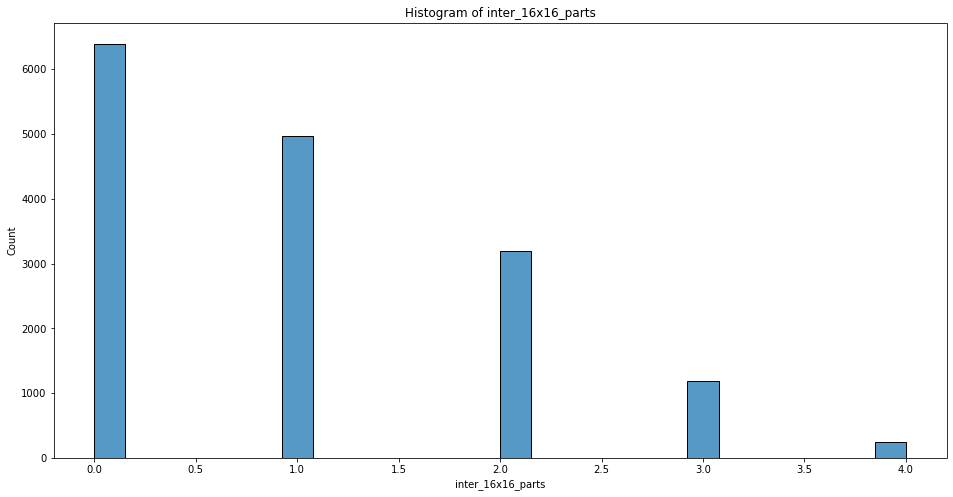

In [41]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")
sns.histplot(df[column_name])

This is difficult to interpret. The description is not clear. 

#### Column: inter_4x4_parts

In [42]:
column_name = "inter_4x4_parts"
print(descr_df.loc[column_name, "description"])

number of sub-blocks inside this block making use of information in other frames and whose size is 4x4 pixels.


<AxesSubplot:title={'center':'Histogram of inter_4x4_parts'}, xlabel='inter_4x4_parts', ylabel='Count'>

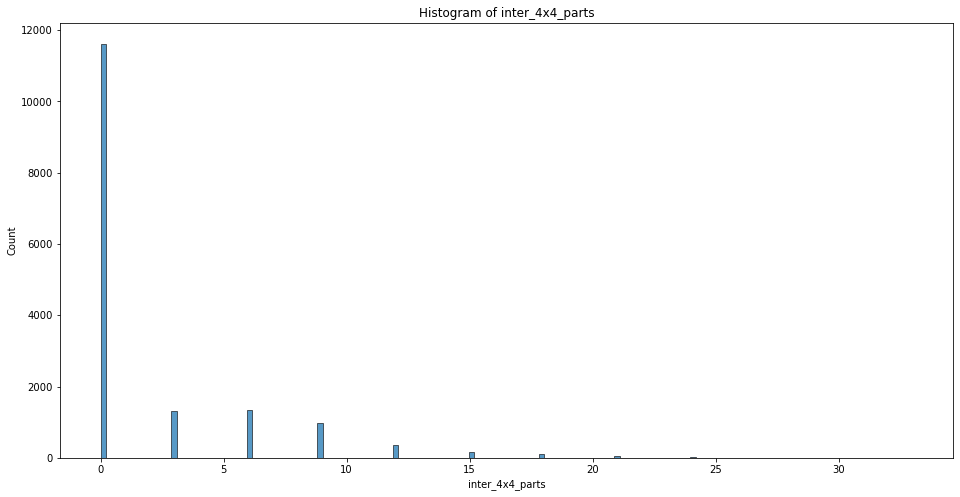

In [43]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")
sns.histplot(df[column_name])

The above two plots have shown that bigger sub-blocks have less information overlap than small sub-blocks. 

#### inter_other_parts

In [44]:
column_name = "inter_other_parts"
print(descr_df.loc[column_name, "description"])

number of sub-blocks inside this block making use of information in other frames and whose size is different from 16x16 and 4x4 pixels.


<AxesSubplot:title={'center':'Histogram of inter_other_parts'}, xlabel='inter_other_parts', ylabel='Count'>

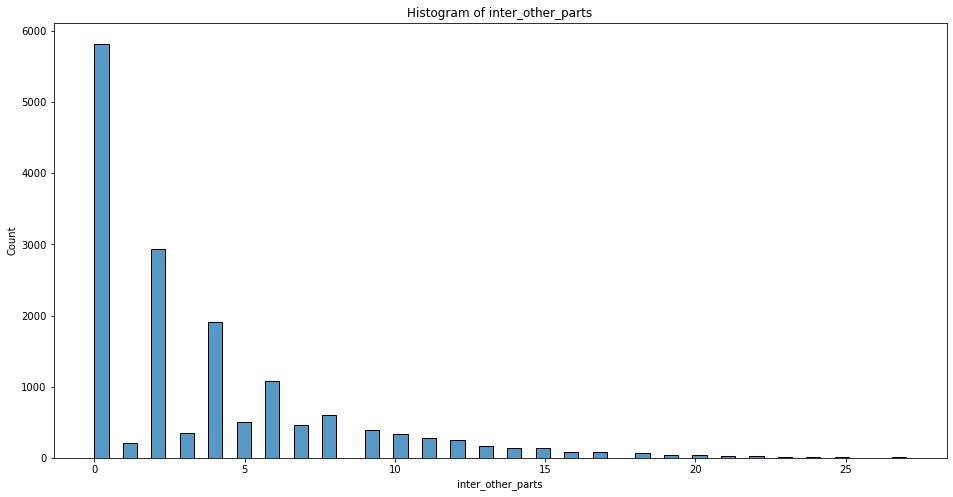

In [45]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title(f"Histogram of {column_name}")
sns.histplot(df[column_name])

#### non_zero_pixels

TODO

#### frame_width

TODO

#### frame_height

TODO

#### movement_level

TODO

#### mean

TODO

#### sub_mean_1

TODO

#### sub_mean_2

TODO

#### sub_mean_3

TODO

#### sub_mean_4

TODO

#### var_sub_blocks

TODO

#### sobel_h

TODO

#### sobel_v

TODO

#### variance

TODO

#### block_movement_h

TODO

#### block_movement_v

TODO

#### var_movement_h

TODO

#### var_movement_v

TODO

#### cost_1

TODO

#### cost_2

TODO

### Target variable: relevant 

In [46]:
column_name = "relevant"
print(descr_df.loc[column_name, "description"])

the target variable that indicates whether the current block is relevant (1) or not (0)


In [47]:
print("Relevant == 1: ", len(df[df.relevant == 1]))
print("Relevant == 0: ", len(df[df.relevant == 0]))

print("Percentage where relevant is 1 out of all: ",len(df[df.relevant == 1])/ len(df))

Relevant == 1:  13156
Relevant == 0:  2842
Percentage where relevant is 1 out of all:  0.8223527940992624


Conclusion of relevant:

There is a high difference in the number of relevant blocks and irrelevant blocks. In the machine learning we may need to stratify the data to not favor the algorithm of predicting 1 all the time. If we do not take this into account, we can create a very simple algorithm already with 82% accuracy (just predict 1 all the time).

As the outcome variable is binary, we should look into methods of classification, e.g. logistic regression / decision tree / neural networks